### Loading the dataset

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import gdown


pklurl = 'https://drive.google.com/uc?id=1VXopPUT5WSojtqJ2TqD9Nnp08FePcOSp'

gdown.download(pklurl, 'data.pkl', quiet=False)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data.pkl')

Downloading...
From (original): https://drive.google.com/uc?id=1VXopPUT5WSojtqJ2TqD9Nnp08FePcOSp
From (redirected): https://drive.google.com/uc?id=1VXopPUT5WSojtqJ2TqD9Nnp08FePcOSp&confirm=t&uuid=b6d20271-59e7-418e-b5d6-f1e6303a04fe
To: /content/data.pkl
100%|██████████| 165M/165M [00:00<00:00, 199MB/s]


#### **Data pre-processing**

In [ ]:
season_map = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
# Introduce the Season by mapping month number to the season_map dict
df['Season'] = df['MONTH_NUMBER'].map(season_map)

# if its not present than it is false, only the true values are filled in the data we have
df['IS_HOLIDAY_LEAVE'] = df['IS_HOLIDAY_LEAVE'].fillna(False)

df = df.rename(columns={
    'DAY_OF_WEEK': 'Day of Week',
    'IS_HOLIDAY_LEAVE': 'Is Holiday',
    'PRCP' : 'Precipitation',
    'SNOW' : 'Snow',
    'TOBS' : 'Temperature',
    'Census Tracts': 'Census',
    'Zip Codes': 'Zip Code'
})

# Select the data columns that will be used for the training
df_for_pred = df[['Day of Week', 'Is Holiday',
                  # Weather features
                  'Season', 'Precipitation', 'Snow', 'Temperature',
                  # Location-related features
                  # 'Block',
                  'Location Description', 'District', 'Ward',
                  'Community Area', 'Census', 'Zip Code',
                  'Latitude', 'Longitude',
                  # Label
                  'Primary Type']]

df_for_pred = pd.get_dummies(df_for_pred, columns=['Location Description'], drop_first=True)
df_for_pred = pd.get_dummies(df_for_pred, columns=['Season'], drop_first=True)

### We have a lot of missing values, as we are going to use Logisticregression, we might need to handle before training

In [ ]:
df_for_pred_cleaned = df_for_pred.dropna()
df_for_pred_cleaned.head()

,Day of Week,Is Holiday,Precipitation,Snow,Temperature,District,Ward,Community Area,Census,Zip Code,Latitude,Longitude,Primary Type,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,Location Description_AIRPORT PARKING LOT,Location Description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,Location Description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,Location Description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,Location Description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,Location Description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,Location Description_AIRPORT TRANSPORTATION SYSTEM (ATS),Location Description_AIRPORT VENDING ESTABLISHMENT,Location Description_AIRPORT/AIRCRAFT,Location Description_ALLEY,Location Description_ANIMAL HOSPITAL,Location Description_APARTMENT,Location Description_APPLIANCE STORE,Location Description_ATHLETIC CLUB,Location Description_ATM (AUTOMATIC TELLER MACHINE),Location Description_AUTO,Location Description_AUTO / BOAT / RV DEALERSHIP,Location Description_BANK,Location Description_BANQUET HALL,Location Description_BAR OR TAVERN,Location Description_BARBER SHOP/BEAUTY SALON,Location Description_BARBERSHOP,Location Description_BASEMENT,Location Description_BOAT / WATERCRAFT,Location Description_BOWLING ALLEY,Location Description_BRIDGE,Location Description_CAR WASH,Location Description_CEMETARY,Location Description_CHA APARTMENT,Location Description_CHA ELEVATOR,Location Description_CHA GROUNDS,Location Description_CHA HALLWAY / STAIRWELL / ELEVATOR,Location Description_CHA LOBBY,Location Description_CHA PARKING LOT,Location Description_CHA PARKING LOT / GROUNDS,Location Description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP,Location Description_CLEANING STORE,Location Description_CLUB,Location Description_COIN OPERATED MACHINE,Location Description_COLLEGE / UNIVERSITY - GROUNDS,Location Description_COLLEGE / UNIVERSITY - RESIDENCE HALL,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_CONSTRUCTION SITE,Location Description_CONVENIENCE STORE,Location Description_CREDIT UNION,"Location Description_CTA ""L"" PLATFORM","Location Description_CTA ""L"" TRAIN",Location Description_CTA BUS,Location Description_CTA BUS STOP,Location Description_CTA PARKING LOT / GARAGE / OTHER PROPERTY,Location Description_CTA PLATFORM,Location Description_CTA PROPERTY,Location Description_CTA STATION,Location Description_CTA TRACKS - RIGHT OF WAY,Location Description_CTA TRAIN,Location Description_CURRENCY EXCHANGE,Location Description_DAY CARE CENTER,Location Description_DEPARTMENT STORE,Location Description_DRIVEWAY,Location Description_DRIVEWAY - RESIDENTIAL,Location Description_DRUG STORE,Location Description_ELEVATOR,Location Description_FACTORY / MANUFACTURING BUILDING,Location Description_FARM,Location Description_FEDERAL BUILDING,Location Description_FIRE STATION,Location Description_FOREST PRESERVE,Location Description_GANGWAY,Location Description_GARAGE,Location Description_GAS STATION,Location Description_GAS STATION DRIVE/PROP.,Location Description_GOVERNMENT BUILDING / PROPERTY,Location Description_GROCERY FOOD STORE,Location Description_HALLWAY,Location Description_HIGHWAY / EXPRESSWAY,Location Description_HOSPITAL BUILDING / GROUNDS,Location Description_HOTEL,Location Description_HOTEL / MOTEL,Location Description_HOUSE,Location Description_JAIL / LOCK-UP FACILITY,Location Description_KENNEL,Location Description_LAKEFRONT / WATERFRONT / RIVERBANK,Location Description_LIBRARY,Location Description_LIQUOR STORE,Location Description_MEDICAL / DENTAL OFFICE,Location Description_MOTEL,Location Description_MOVIE HOUSE / THEATER,Location Description_NEWSSTAND,Location Description_NURSING / RETIREMENT HOME,Location Description_OFFICE,Location Description_OTHER (SPECIFY)

# Preparing Data for training



1.   Separating features and target label


In [ ]:
# Separate features and target label
X = df_for_pred_cleaned.drop('Primary Type', axis=1)
y = df_for_pred_cleaned['Primary Type']


2.   Split data into train/test splits

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



3.   Standardize numeric values



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4.  Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=2000, penalty = 'l2', random_state=42)

reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

### **Evaluation**

Accuracy: 0.3026
Confusion Matrix:


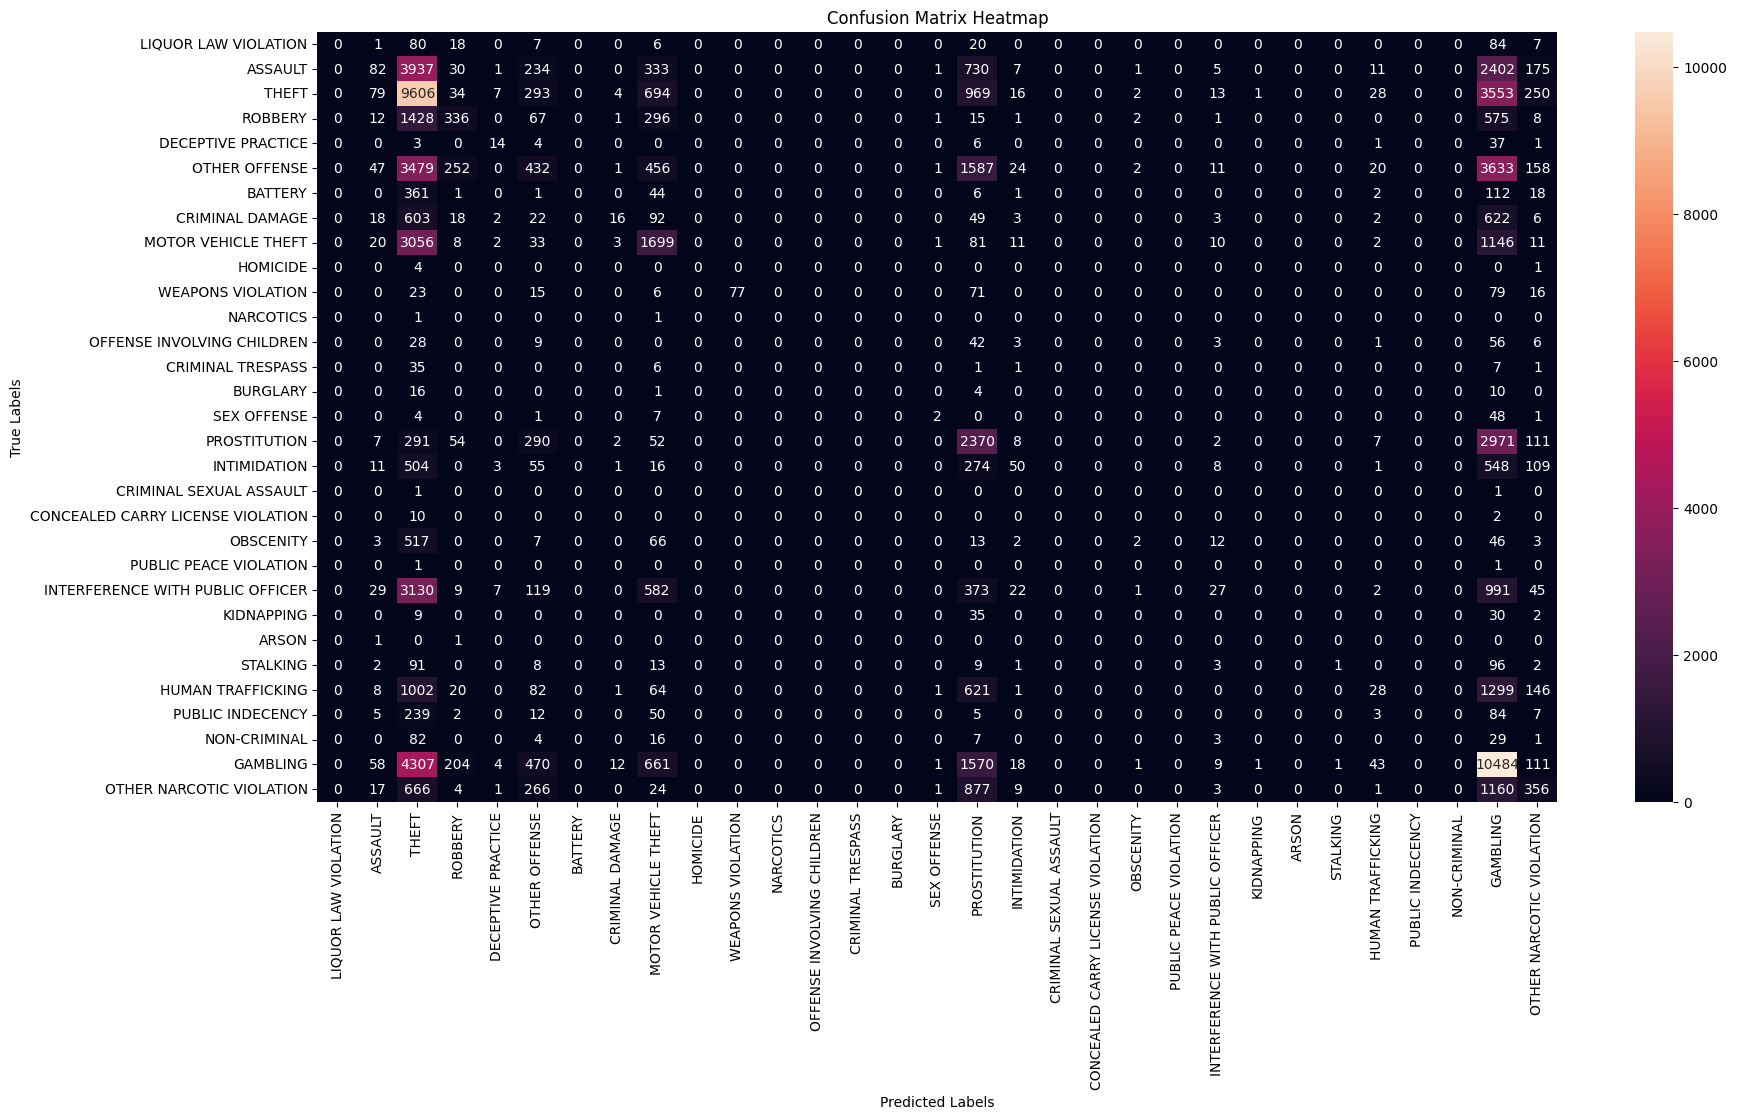

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                   precision    recall  f1-score   support

                            ARSON       0.00      0.00      0.00       223
                          ASSAULT       0.20      0.01      0.02      7949
                          BATTERY       0.29      0.62      0.39     15549
                         BURGLARY       0.34      0.12      0.18      2743
CONCEALED CARRY LICENSE VIOLATION       0.34      0.21      0.26        66
                  CRIMINAL DAMAGE       0.18      0.04      0.07     10103
          CRIMINAL SEXUAL ASSAULT       0.00      0.00      0.00       546
                CRIMINAL TRESPASS       0.39      0.01      0.02      1456
               DECEPTIVE PRACTICE       0.33      0.28      0.30      6083
                         GAMBLING       0.00      0.00      0.00         5
                         HOMICIDE       1.00      0.27      0.42       287
                HUMAN TRAFFICKING       0.00      0.00      0.00         2
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = reg_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

class_names = y_train.unique()
# print(class_names)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()



# Print detailed classification report (precision, recall, f1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


## **Conclusion**

With logistic regression we got very low accuracy which suggests that the model struggles at predicting the correct crime type, possible reasons might be

- class imbalance
- wrong model(Logistic Regression)
- data preprocessing pipeline or the columns that were used for prediction
